In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.decomposition import PCA



In [4]:
# Step 1: Load the dataset and create a separate DataFrame with only numeric data
data = pd.read_csv("Country-data.csv")
numeric_data = data.drop("country", axis=1)



In [5]:
# Step 2: Scale the data using Standard Scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)



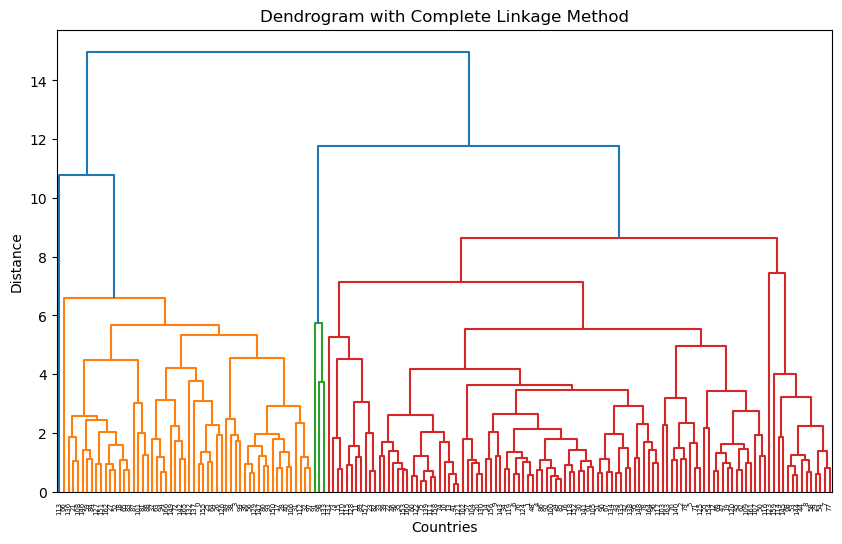

In [7]:
# Step 3: Plot dendrograms with complete linkage method
plt.figure(figsize=(10, 6))
dendrogram(linkage(scaled_df, method='complete'))
plt.title('Dendrogram with Complete Linkage Method')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.show()



In [8]:
# Step 4: Creating cluster labels using cut tree
clusters = cut_tree(linkage(scaled_df, method='complete'), n_clusters=3).flatten()
scaled_df['Cluster'] = clusters



In [9]:
# Step 5: Perform 4-Component PCA on DataFrame
pca = PCA(n_components=4)
pca_result = pca.fit_transform(scaled_df.drop('Cluster', axis=1))



In [10]:

# Step 6: Analyze how the low GDP rate corresponds to the child mortality rate
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['Country'] = data['country']
pca_df['GDP'] = data['gdpp']
pca_df['Child Mortality'] = data['child_mort']



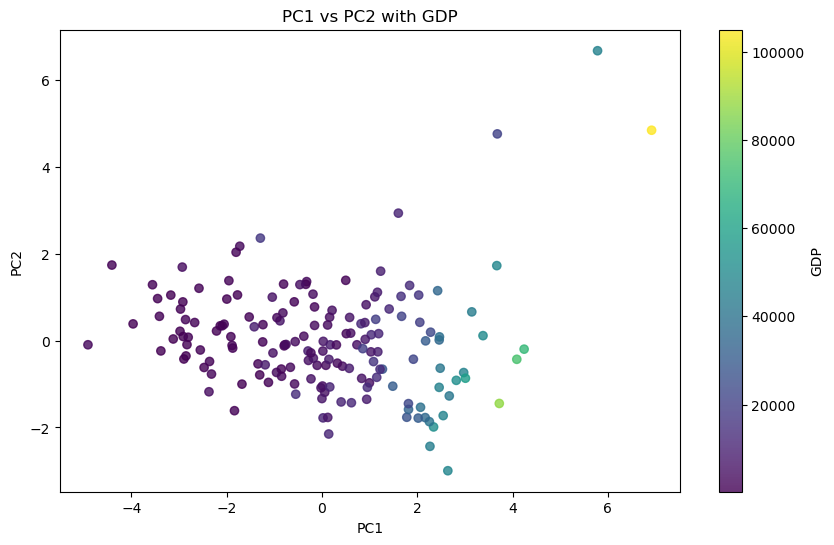

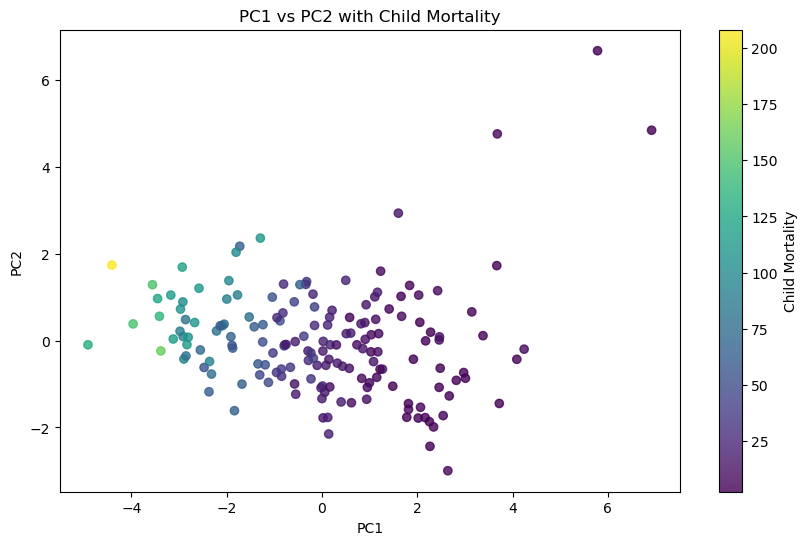

In [11]:
# Scatter plot of PC1 vs PC2 with GDP and Child Mortality
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['GDP'], cmap='viridis', alpha=0.8)
plt.colorbar(label='GDP')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 with GDP')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Child Mortality'], cmap='viridis', alpha=0.8)
plt.colorbar(label='Child Mortality')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 with Child Mortality')
plt.show()